# Create a subset of deso zones and 1 km x 1 km grids

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd D:\FlowsGeneration

D:\FlowsGeneration


In [2]:
import geopandas as gpd

## 1. Load DeSO zones and get the subset of VGR

In [36]:
# Load zones
zones = gpd.read_file('dbs/sweden/zones/DeSO/DeSO_2018_v2.shp')
zones.loc[:, 'deso_3'] = zones.loc[:, 'deso'].apply(lambda x: x[:2]) # First 3 digits
zones.head()

,id,objectid,uuid,deso,befolkning,version,geometry,deso_3
0,1.0,1,{D9661502-EE24-45AE-A1F7-C1C80F463556},0114A0010,790,2018_v2,"POLYGON ((661116.252 6606615.603, 661171.409 6...",01
1,2.0,2,{5EA47309-A001-4E2A-843E-02EC8F544E4C},0114C1010,1608,2018_v2,"POLYGON ((666960.066 6598800.393, 666971.371 6...",01
2,3.0,3,{0DA292ED-A306-4D7E-A392-BD063A3093E1},0114C1020,1610,2018_v2,"POLYGON ((667034.814 6600076.634, 667032.984 6...",01
3,4.0,4,{18583EFC-ECC1-4D27-B520-DA294F5658FD},0114C1030,2365,2018_v2,"POLYGON ((667095.512 6599103.521, 667095.009 6...",01
4,5.0,5,{6574A7B3-AD12-4A81-8EAC-773B976B72BC},0114C1040,2346,2018_v2,"POLYGON ((664610.264 6600922.821, 664638.910 6...",01


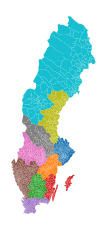

In [37]:
ax = zones.plot(column='deso_3')
ax.set_axis_off()

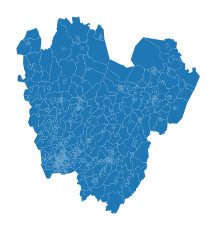

In [39]:
ax = zones.loc[zones['deso_3'] == '14', :].plot(column='deso_3')
ax.set_axis_off()

In [41]:
zones_subset = zones.loc[zones['deso_3'] == '14', :]
print("Number of DeSO zones %s for VGR."%len(zones_subset))

Number of DeSO zones 992 for VGR.


### 1.1 Aggregation level for validation
Try first five characters of deso code.

In [55]:
zones_subset.loc[:, 'deso_5'] = zones_subset.loc[:, 'deso'].apply(lambda x: x[:5]) # First 5 digits
zones_subset.to_file('dbs/sweden/zones/DeSO/DeSO_VGR.shp')
zones_subset.deso_5.nunique()

C:\Users\yuanlia\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


127

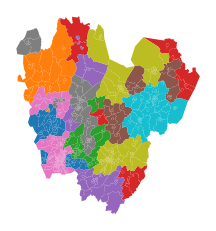

In [56]:
ax = zones_subset.plot(column='deso_5')
ax.set_axis_off()

## 2. Create 2 km x 2 km grids for the extent of the subset of DeSO zones
This is done in QGIS. The population density is sampled by using the grids' centroids on top of DeSO zones.
When aggregating the generated flows, we need to aggregate to a higher level to avoid mismatch between the grids and small DeSO zones

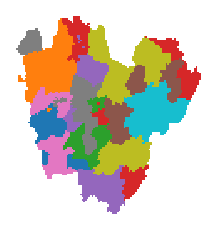

In [58]:
grids = gpd.read_file('results/grids_vgr_2km_density_deso5.shp')
ax = grids.plot(column='deso_5')
ax.set_axis_off()

In [59]:
grids.head()

,density,zone,deso_5,geometry
0,26.055,1,1401A,"POLYGON ((342000.000 6390000.000, 342000.000 6..."
1,26.055,2,1401A,"POLYGON ((342000.000 6396000.000, 342000.000 6..."
2,26.055,3,1401A,"POLYGON ((344000.000 6390000.000, 344000.000 6..."
3,26.055,4,1401A,"POLYGON ((344000.000 6392000.000, 344000.000 6..."
4,26.055,5,1401A,"POLYGON ((344000.000 6394000.000, 344000.000 6..."
